### Exercise 8.1

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

x, r = symbols('x r')

Xdot = r * x * (x + 1) - x

In [2]:
#Find eq. Points.
eq_points = solve([Xdot], (x))
eq_point_1 = eq_points[0][0]
eq_point_2 = eq_points[1][0]

In [3]:
eq_point_1

In [4]:
eq_point_2

In [5]:
#Find Jacobian
dF = Xdot.diff(x)
dF

In [6]:
#Substitute eq. point 1 into Jacobian. 
dF_eq_1 = dF.subs(x, eq_point_1)
dF_eq_1

In [7]:
#Substitute eq. point 2 into Jacobian. 
dF_eq_2 = dF.subs(x, eq_point_2)
dF_eq_2

In [8]:
def eqn1(s):
    return s - 1

def eqn2(s):
    return s * (1 - ((s-1)/s)) - s
    
def eqn3(s):
    return - (s - 1) / s

### Bifurcation Analysis
By solving `eqn1` and `eqn2` and finding the values of `s` that both equations are `s > 0`, it is possible to find the values of the model that are unstable. In this case, for values `s > 1` the model is considered to be unstable.

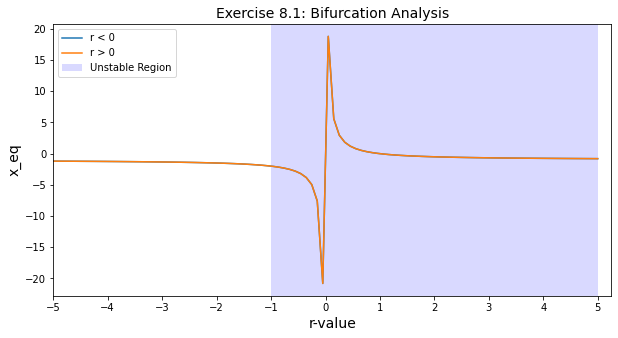

In [16]:
#Model is unstable for r > 1.
domain = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 5))
plt.plot(domain, [eqn3(each) for each in domain], label='r < 0')
plt.plot(domain, [eqn3(each) for each in domain], label='r > 0')
plt.xlabel('r-value', fontsize=14)
plt.ylabel('x_eq', fontsize=14)
plt.title('Exercise 8.1: Bifurcation Analysis', fontsize=14)
plt.axvspan(-1, 5, color='b', alpha=0.15, lw=0, label='Unstable Region')
plt.xlim(-5, 5.25)
plt.xticks(np.arange(-5, 6, step=1))
plt.legend()
plt.show()

In [10]:
def model(rconst, t_not, X_not, tdomain, dt):
    t_results = [t_not]
    X_results = [X_not]

    while t_results[-1] <= tdomain:

        Xdot = rconst * X_results[-1] * (X_results[-1] + 1) - X_results[-1]
        nx = X_results[-1]  + Xdot * dt
        time = t_results[-1] + dt

        t_results.append(time) 
        X_results.append(nx) 

    results = {}
    results['time'] = t_results
    results['x'] = X_results

    return results

run = model(rconst=1, dt=0.01, t_not=0, X_not=0.1, tdomain=10)

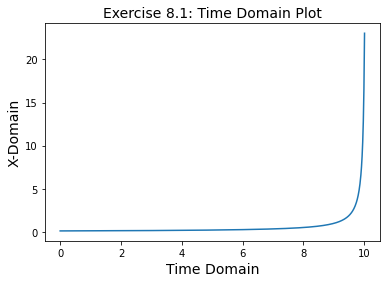

In [11]:
plt.plot(run['time'], run['x'])
plt.xlabel('Time Domain', fontsize=14)
plt.ylabel('X-Domain', fontsize=14)
plt.title('Exercise 8.1: Time Domain Plot', fontsize=14)
plt.show()